# TP N°5 - Circuitos trifásicos
__U.N.L.Z. - Facultad de Ingeniería__       
__Electrotecnia__      
__Alumno:__ Daniel Antonio Lorenzo       
<mark><strong>(Resolución en python3)</strong></mark>

<a href="https://colab.research.google.com/github/daniel-lorenzo/Electrotecnia/blob/master/Ejercitacion/TP5-2.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>

## Problema N°2
Un sistema trifásico CBA (secuencia inversa o indirecta 3x380V (tensión eficaz compuesta o de línea), de 4 conductores (tetrafilar), alimenta una carga trifásica conectada en estrella.

El valor de cada impedancia es de 20 Ohm con ángulo de desfasaje de 30° capacitivo.

1. Calcular las corrientes $I_r, \, I_s, \, I_t, \, I_\mathrm{neutro}$, representar diagrama fasorial de tensiones y corrientes.
2. Determinar la potencia por fase y trifásica.

<img src="img/tp5ej2.png">

### Solución

* Las tensiones de generación las denominaremos con la letra E, $E_{an}, \, E_{bn}, \, E_{cn}$
* Las caídas de tensión en las impedancias de carga las denominamos con la letra U, $U_{ao}, \; U_{bo}, \, U_{co}$
* Las corrientes que circulan por la carga las denominamos con la letra I, $I_a, \, I_b \, I_c$

La corriente que circula por el cuarto conductor, que une el centro de estrella del generador (n) y el neutro de la carga (o), se denomina corriente de neutro, $I_\mathrm{neutro}$

In [1]:
import numpy as np
import cmath

In [2]:
# Datos
E_lin = 380 # V                  Tensión de línea
E_fase = E_lin/np.sqrt(3)  #     Tensión de fase
# Tensiones de generación
Ean = cmath.rect(E_fase, np.deg2rad(0) )
Ebn = cmath.rect(E_fase, np.deg2rad(120))
Ecn = cmath.rect(E_fase, np.deg2rad(240))
# Tensiones en las impedancias de carga
Uao = Ean
Ubo = Ebn
Uco = Ecn
# Impedancias de carga
Za = cmath.rect(20, np.deg2rad(-30) )
Zb = Za
Zc = Za

In [3]:
# Cálculo de corrientes de fase
Ia = Uao/Za
Ib = Ubo/Zb
Ic = Uco/Zc
# Corriente de neutro (sistema balanceado)
I_neutro = Ia + Ib + Ic
# Potencia aparente
Sa = Uao*Ia.conjugate()
Sb = Ubo*Ib.conjugate()
Sc = Uco*Ic.conjugate()
# Potencia real
Pa = Sa.real
Pb = Sb.real
Pc = Sc.real
# Potencia reactiva
Qa = Sa.imag
Qb = Sb.imag
Qc = Sc.imag
# Potencia trifásica aparente 
Strif = Sa + Sb + Sc
# Potencia trifásica real
Ptrif = Strif.real
# Potencia trifásica reactiva
Qtrif = Strif.imag

In [4]:
print('Corrientes de fase:')
print('Ia = (%.2f ∠ %.2f°) A'%(abs(Ia) , np.rad2deg( cmath.phase(Ia) ) ))
print('Ib = (%.2f ∠ %.2f°) A'%(abs(Ib) , np.rad2deg( cmath.phase(Ib) ) ))
print('Ic = (%.2f ∠ %.2f°) A'%(abs(Ic) , np.rad2deg( cmath.phase(Ic) ) ))
print('Corriente de neutro:')
print('I_neutro = %.2f A'%abs(I_neutro))
print('Potencia aparente:')
print('Sa = {:.2f} VA = (%.2f ∠ %.2f°) VA'.format(Sa)%(abs(Sa) , np.rad2deg( cmath.phase(Sa) ) ))
print('Sb = {:.2f} VA = (%.2f ∠ %.2f°) VA'.format(Sb)%(abs(Sb) , np.rad2deg( cmath.phase(Sb) ) ))
print('Sc = {:.2f} VA = (%.2f ∠ %.2f°) VA'.format(Sc)%(abs(Sc) , np.rad2deg( cmath.phase(Sc) ) ))
print('Potencia activa:')
print('Pa = %.2f W'%Pa)
print('Pb = %.2f W'%Pb)
print('Pc = %.2f W'%Pc)
print('Potencia reactiva:')
print('Qa = %.2f VAr'%Qa)
print('Qb = %.2f VAr'%Qb)
print('Qc = %.2f VAr'%Qc)
print('Potencia trifásica aparente:')
print('Strif = {:.2f} VA = (%.2f ∠ %.2f°) VA'.format(Strif)%(abs(Strif) , np.rad2deg( cmath.phase(Strif) ) ))
print('Potencia trifásica activa:')
print('Ptrif = %.2f W'%Ptrif)
print('Potencia trifásica reactiva:')
print('Qtrif = %.2f VAr'%Qtrif)

Corrientes de fase:
Ia = (10.97 ∠ 30.00°) A
Ib = (10.97 ∠ 150.00°) A
Ic = (10.97 ∠ -90.00°) A
Corriente de neutro:
I_neutro = 0.00 A
Potencia aparente:
Sa = 2084.23-1203.33j VA = (2406.67 ∠ -30.00°) VA
Sb = 2084.23-1203.33j VA = (2406.67 ∠ -30.00°) VA
Sc = 2084.23-1203.33j VA = (2406.67 ∠ -30.00°) VA
Potencia activa:
Pa = 2084.23 W
Pb = 2084.23 W
Pc = 2084.23 W
Potencia reactiva:
Qa = -1203.33 VAr
Qb = -1203.33 VAr
Qc = -1203.33 VAr
Potencia trifásica aparente:
Strif = 6252.70-3610.00j VA = (7220.00 ∠ -30.00°) VA
Potencia trifásica activa:
Ptrif = 6252.70 W
Potencia trifásica reactiva:
Qtrif = -3610.00 VAr


In [5]:
import numpy as np
import matplotlib.pyplot as plt

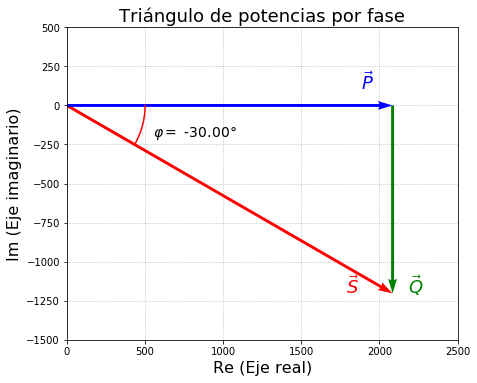

In [6]:
%matplotlib inline
plt.figure(figsize=(7,7))
ax = plt.gca()
ax.quiver(0,0,Pa,Qa,angles='xy',scale_units='xy',scale=1,color='red')
ax.quiver(0,0,Pa,0,angles='xy',scale_units='xy',scale=1,color='blue')
ax.quiver(Pa,0,0,Qa,angles='xy',scale_units='xy',scale=1,color='green')   
plt.text(Pa - 300, Qa, r'$\vec S$', fontsize=18, color='red', fontweight='bold')
plt.text(Pa - 200,  100, r'$\vec P$', fontsize=18, color='blue', fontweight='bold')
plt.text(Pa + 100, Qa, r'$\vec Q$', fontsize=18, color='green', fontweight='bold')
plt.text(550,  -200, r'$\varphi =$ %.2f°'%( np.rad2deg( cmath.phase(Sa) ) ), fontsize=14)
theta = np.linspace(0, cmath.phase(Sa), 100) 
x1 = 500 * np.cos(theta)
x2 = 500 * np.sin(theta)
plt.plot(x1, x2, color='red')
ax.set_xlim([0,2500])
ax.set_ylim([-1500,500])
ax.set_aspect('equal')
plt.title('Triángulo de potencias por fase', fontsize=18)
plt.xlabel('Re (Eje real)',  fontsize=16)
plt.ylabel('Im (Eje imaginario)',  fontsize=16)
plt.grid(linestyle=":")
ax.set_axisbelow(True)
plt.draw()
plt.show()

A cada una de las fases le corresponde un valor de potencia monofásica.

In [7]:
%reset -s -f

## Problema N°3
Un sistema trifásico de secuencia CBA 3x380V de 4 conductores, alimenta una carga trifásica en estrella.

$Z_a = 6 \, \Omega$ con ángulo de desfasaje 0°    
$Z_b = 6 \, \Omega$ con ángulo de desfasaje 30° inductivo    
$Z_c = 5 \, \Omega$ con ángulo de desfasaje 45° inductivo

1. Calcular las corrientes $I_r, \, I_s, \ I_t, \, I_\mathrm{neutro}$, representar el diagrama de tensiones y corrientes.
2. Determinar la potencia en cada fase y la potencia trifásica.

<img src="img/tp5ej2.png">

### Solución

In [8]:
import numpy as np
import cmath

In [9]:
# Datos:
E_lin = 380 # V                       (tensión de línea)
E_fase = E_lin/np.sqrt(3) # V         (tensión de fase)
# Tensiones de generación:
Ean = cmath.rect(E_fase, np.deg2rad(0) )
Ebn = cmath.rect(E_fase, np.deg2rad(120))
Ecn = cmath.rect(E_fase, np.deg2rad(240))
# Caídas de tensión en las cargas
Uao = Ean
Ubo = Ebn
Uco = Ecn
# Impedancias de carga
Za = cmath.rect(6,0)
Zb = cmath.rect(6, np.deg2rad(30) )
Zc = cmath.rect(5, np.deg2rad(45) )

<div class="alert-danger">
<strong>La carga trifásica NO es equilibrada</strong>, conectada en estrella, eso significa que las tres impedancias <strong>NO SON iguales</strong> entre sí.
    </div>

In [10]:
# Cálculo de las intensidades de corriente en fase
Ia = Uao/Za
Ib = Ubo/Zb
Ic = Uco/Zc
# Cálculo de intensidad de corriente de Neutro (4to. conductor)
In = Ia + Ib +Ic
# Cálculo de potencia aparente
Sa = Uao*Ia.conjugate()
Sb = Ubo*Ib.conjugate()
Sc = Uco*Ic.conjugate()
# Cálculo de potencia activa
Pa = Sa.real
Pb = Sb.real
Pc = Sc.real
# Cálculo de potencia reactiva
Qa = Sa.imag
Qb = Sb.imag
Qc = Sc.imag
# Cálculo de potencia trifásica aparente
Strif = Sa + Sb + Sc
# Potencia trifásica activa
Ptrif = Strif.real
# Potencia trifásica reactiva
Qtrif = Strif.imag

In [11]:
print('Corrientes de fase:')
print('Ia = (%.2f ∠ %.2f°) A'%(abs(Ia) , np.rad2deg( cmath.phase(Ia) ) ))
print('Ib = (%.2f ∠ %.2f°) A'%(abs(Ib) , np.rad2deg( cmath.phase(Ib) ) ))
print('Ic = (%.2f ∠ %.2f°) A'%(abs(Ic) , np.rad2deg( cmath.phase(Ic) ) ))
print('Corriente de neutro:')
print('In = (%.2f ∠ %.2f°) A'%(abs(In) , np.rad2deg( cmath.phase(In) ) ))
print('Potencia aparente:')
print('Sa = {:.2f} VA = (%.2f ∠ %.2f°) VA'.format(Sa)%(abs(Sa) , np.rad2deg( cmath.phase(Sa) ) ))
print('Sb = {:.2f} VA = (%.2f ∠ %.2f°) VA'.format(Sb)%(abs(Sb) , np.rad2deg( cmath.phase(Sb) ) ))
print('Sc = {:.2f} VA = (%.2f ∠ %.2f°) VA'.format(Sc)%(abs(Sc) , np.rad2deg( cmath.phase(Sc) ) ))
print('Potencia activa:')
print('Pa = %.2f W'%Pa)
print('Pb = %.2f W'%Pb)
print('Pc = %.2f W'%Pc)
print('Potencia reactiva:')
print('Qa = %.2f VAr'%Qa)
print('Qb = %.2f VAr'%Qb)
print('Qc = %.2f VAr'%Qc)
print('Potencia trifásica aparente:')
print('Strif = {:.2f} VA = (%.2f ∠ %.2f°) VA'.format(Strif)%(abs(Strif) , np.rad2deg( cmath.phase(Strif) ) ))
print('Potencia trifásica activa:')
print('Ptrif = %.2f W'%Ptrif)
print('Potencia trifásica reactiva:')
print('Qtrif = %.2f VAr'%Qtrif)

Corrientes de fase:
Ia = (36.57 ∠ 0.00°) A
Ib = (36.57 ∠ 90.00°) A
Ic = (43.88 ∠ -165.00°) A
Corriente de neutro:
In = (25.87 ∠ 103.00°) A
Potencia aparente:
Sa = 8022.22+0.00j VA = (8022.22 ∠ 0.00°) VA
Sb = 6947.45+4011.11j VA = (8022.22 ∠ 30.00°) VA
Sc = 6807.08+6807.08j VA = (9626.67 ∠ 45.00°) VA
Potencia activa:
Pa = 8022.22 W
Pb = 6947.45 W
Pc = 6807.08 W
Potencia reactiva:
Qa = 0.00 VAr
Qb = 4011.11 VAr
Qc = 6807.08 VAr
Potencia trifásica aparente:
Strif = 21776.75+10818.19j VA = (24315.84 ∠ 26.42°) VA
Potencia trifásica activa:
Ptrif = 21776.75 W
Potencia trifásica reactiva:
Qtrif = 10818.19 VAr


In [12]:
%reset -s -f

## Problema N°4
Un sistema trifásico de secuencia ABC (secuencia directa), 3x380V (tensiones de línea en valor eficaz), de 3 conductores (sistema trifilar), alimente una carga trifásica __equilibrada y simétrica (perfecta)__ conectada en triángulo.

El valor de cada impedancia es de 5 Ohm con ángulo de desfasaje de 45° inductivo.
1. Calcular las corrientes $I_r, \, I_s, \, I_t$, representar el diagrama fasorial de tensiones y corrientes.
2. Determinar las potencias por fase y trifásica (P,Q,S)

<img src="img/tp5ej4.png">

> Las impedancias de carga son iguales entre sí, (cargatrifásica equilibrada y simétrica perfecta).

### Solución

In [13]:
import numpy as np
import cmath

In [14]:
# Datos:
# Tensiones de línea
Eab = cmath.rect(380, np.deg2rad(30) )
Ebc = cmath.rect(380, np.deg2rad(30-120) )
Eca = cmath.rect(380, np.deg2rad(30+120) )
# Caídas de tensión compuesta en las impedancias de cargas
Uab = Eab
Ubc = Ebc
Uca = Eca
# Impedancias de carga
Zab = cmath.rect(5, np.deg2rad(45) )
Zbc = Zab
Zca = Zbc

In [15]:
# Cálculo de corriente de línea o compuesta
Iab = Uab/Zab
Ibc = Ubc/Zbc
Ica = Uca/Zca
# Cálculo de corrientes de fase
Ir = Iab - Ica
Is = Ibc - Iab
It = Ica - Ibc
Ia = Ir ; Ib = Is ; Ic = It
# Cálculo de potencia aparente
Sab = Uab*Iab.conjugate()
Sbc = Ubc*Ibc.conjugate()
Sca = Uca*Ica.conjugate()
# Potencia activa
Pab = Sab.real
Pbc = Sbc.real
Pca = Sca.real
# Potencia reactiva
Qab = Sab.imag
Qbc = Sab.imag
Qca = Sca.imag
# Potencia trifásica aparente
Strif = Sab + Sbc + Sca
# Potencia trifásica activa
Ptrif = Strif.real
# Potencia trifásica reactiva
Qtrif = Strif.imag

In [16]:
print('Corrientes de línea o compuesta:')
print('Iab = (%.2f ∠ %.2f) A'%(abs(Iab) , np.rad2deg( cmath.phase(Iab) ) ))
print('Ibc = (%.2f ∠ %.2f) A'%(abs(Ibc) , np.rad2deg( cmath.phase(Ibc) ) ))
print('Ica = (%.2f ∠ %.2f) A'%(abs(Ica) , np.rad2deg( cmath.phase(Ica) ) ))
print('Corrientes de fase:')
print('Ir = Ia = (%.2f ∠ %.2f) A'%(abs(Ir) , np.rad2deg( cmath.phase(Ir) ) ))
print('Is = Ib = (%.2f ∠ %.2f) A'%(abs(Is) , np.rad2deg( cmath.phase(Is) ) ))
print('It = Ic = (%.2f ∠ %.2f) A'%(abs(It) , np.rad2deg( cmath.phase(It) ) ))
print('Potencia aparente:')
print('|Sab| = %.1f VA'%abs(Sab))
print('|Sbc| = %.1f VA'%abs(Sbc))
print('|Sca| = %.1f VA'%abs(Sca))
print('Sab = {:.2f} VA = (%.2f ∠ %.2f°) VA'.format(Sab)%(abs(Sab), np.rad2deg( cmath.phase(Sab) ) ))
print('Sbc = {:.2f} VA = (%.2f ∠ %.2f°) VA'.format(Sbc)%(abs(Sbc), np.rad2deg( cmath.phase(Sbc) ) ))
print('Sca = {:.2f} VA = (%.2f ∠ %.2f°) VA'.format(Sca)%(abs(Sca), np.rad2deg( cmath.phase(Sca) ) ))
print('Potencia activa:')
print('Pab = %.2f W'%Pab)
print('Pbc = %.2f W'%Pbc)
print('Pca = %.2f W'%Pca)
print('Potencia reactiva:')
print('Qab = %.2f VAr'%Qab)
print('Qbc = %.2f VAr'%Qbc)
print('Qca = %.2f VAr'%Qca)
print('Potencia trifásica aparente:')
print('|Strif| = %.2f VA'%abs(Strif))
print('Strif = {:.2f} VA = (%.2f ∠ %.2f°) VA'.format(Strif)%(abs(Strif) , np.rad2deg( cmath.phase(Sab) ) ))
print('Potencia trifásica activa:')
print('Ptrif = %.2f W'%Ptrif)
print('Potencia trifásica reactiva:')
print('Qtrif = %.2f VAr'%Qtrif)

Corrientes de línea o compuesta:
Iab = (76.00 ∠ -15.00) A
Ibc = (76.00 ∠ -135.00) A
Ica = (76.00 ∠ 105.00) A
Corrientes de fase:
Ir = Ia = (131.64 ∠ -45.00) A
Is = Ib = (131.64 ∠ -165.00) A
It = Ic = (131.64 ∠ 75.00) A
Potencia aparente:
|Sab| = 28880.0 VA
|Sbc| = 28880.0 VA
|Sca| = 28880.0 VA
Sab = 20421.24+20421.24j VA = (28880.00 ∠ 45.00°) VA
Sbc = 20421.24+20421.24j VA = (28880.00 ∠ 45.00°) VA
Sca = 20421.24+20421.24j VA = (28880.00 ∠ 45.00°) VA
Potencia activa:
Pab = 20421.24 W
Pbc = 20421.24 W
Pca = 20421.24 W
Potencia reactiva:
Qab = 20421.24 VAr
Qbc = 20421.24 VAr
Qca = 20421.24 VAr
Potencia trifásica aparente:
|Strif| = 86640.00 VA
Strif = 61263.73+61263.73j VA = (86640.00 ∠ 45.00°) VA
Potencia trifásica activa:
Ptrif = 61263.73 W
Potencia trifásica reactiva:
Qtrif = 61263.73 VAr


In [17]:
%reset -s -f

## Problema 5
Un sistema trifásico de secuencia ABC 3x380V, de 3 conductores, alimenta una carga trifásica conectada en triángulo.

* $Z_{ab} = 10 \, \Omega$ con ángulo de desfasaje 0°      
* $Z_{bc} = 10 \, \Omega$ con ángulo de desfasaje 30° inductivo
* $Z_{ca} = 15 \, \Omega$ con ángulo de desfasaje 30° capacitivo

1. Calcular las corrientes $I_r, \, I_s, \, I_t$, representar diagrama fasorial de tensiones y corrientes.
2. Determinar las potencias en cada fase y las potencias trifásicas (P,Q,S)

<img src="img/tp5ej5.png">

### Solución

In [18]:
import numpy as np
import cmath

In [19]:
# Datos:
# Tensiones de línea
Eab = cmath.rect(380 , np.deg2rad(30) )
Ebc = cmath.rect(380 , np.deg2rad(30-120) )
Eca = cmath.rect(380 , np.deg2rad(30+120) )
# Caídas de tensión compuesta en las impedancias de cargas
Uab = Eab
Ubc = Ebc
Uca = Eca
# Impedancias de carga
Zab = cmath.rect(10 , 0)
Zbc = cmath.rect(10 , np.deg2rad(30) )
Zca = cmath.rect(15 , np.deg2rad(-30) )

In [20]:
# Cálculo de corrientes de línea o compuesta
Iab = Uab/Zab
Ibc = Ubc/Zbc
Ica = Uca/Zca
# Cálculo de corrientes de fase
Ir = Iab - Ica
Is = Ibc - Iab
It = Ica - Ibc
Ia = Ir ; Ib = Is ; Ic = It
# Cálculo de potencia aparente
Sab = Uab*Iab.conjugate()
Sbc = Ubc*Ibc.conjugate()
Sca = Uca*Ica.conjugate()
# Potencia activa
Pab = Sab.real
Pbc = Sbc.real
Pca = Sca.real
# Potencia reactiva
Qab = Sab.imag
Qbc = Sbc.imag
Qca = Sca.imag
# Cálculo de potencia trifásica aparente
Strif = Sab + Sbc + Sca
Ptrif = Strif.real
Qtrif = Strif.imag

In [21]:
print('Corrientes de línea o compuesta:')
print('Iab = (%.2f ∠ %.2f) A'%(abs(Iab) , np.rad2deg( cmath.phase(Iab) ) ))
print('Ibc = (%.2f ∠ %.2f) A'%(abs(Ibc) , np.rad2deg( cmath.phase(Ibc) ) ))
print('Ica = (%.2f ∠ %.2f) A'%(abs(Ica) , np.rad2deg( cmath.phase(Ica) ) ))
print('Corrientes de fase:')
print('Ir = Ia = (%.2f ∠ %.2f) A'%(abs(Ir) , np.rad2deg( cmath.phase(Ir) ) ))
print('Is = Ib = (%.2f ∠ %.2f) A'%(abs(Is) , np.rad2deg( cmath.phase(Is) ) ))
print('It = Ic = (%.2f ∠ %.2f) A'%(abs(It) , np.rad2deg( cmath.phase(It) ) ))
print('Potencia aparente:')
print('|Sab| = %.1f VA'%abs(Sab))
print('|Sbc| = %.1f VA'%abs(Sbc))
print('|Sca| = %.1f VA'%abs(Sca))
print('Sab = {:.2f} VA = (%.2f ∠ %.2f°) VA'.format(Sab)%(abs(Sab), np.rad2deg( cmath.phase(Sab) ) ))
print('Sbc = {:.2f} VA = (%.2f ∠ %.2f°) VA'.format(Sbc)%(abs(Sbc), np.rad2deg( cmath.phase(Sbc) ) ))
print('Sca = {:.2f} VA = (%.2f ∠ %.2f°) VA'.format(Sca)%(abs(Sca), np.rad2deg( cmath.phase(Sca) ) ))
print('Potencia activa:')
print('Pab = %.2f W'%Pab)
print('Pbc = %.2f W'%Pbc)
print('Pca = %.2f W'%Pca)
print('Potencia reactiva:')
print('Qab = %.2f VAr'%Qab)
print('Qbc = %.2f VAr'%Qbc)
print('Qca = %.2f VAr'%Qca)
print('Potencia trifásica aparente:')
print('|Strif| = %.2f VA'%abs(Strif))
print('Strif = {:.2f} VA = (%.2f ∠ %.2f°) VA'.format(Strif)%(abs(Strif) , np.rad2deg( cmath.phase(Sab) ) ))
print('Potencia trifásica activa:')
print('Ptrif = %.2f W'%Ptrif)
print('Potencia trifásica reactiva:')
print('Qtrif = %.2f VAr'%Qtrif)

Corrientes de línea o compuesta:
Iab = (38.00 ∠ 30.00) A
Ibc = (38.00 ∠ -120.00) A
Ica = (25.33 ∠ -180.00) A
Corrientes de fase:
Ir = Ia = (61.26 ∠ 18.07) A
Is = Ib = (73.41 ∠ -135.00) A
It = Ic = (33.51 ∠ 100.89) A
Potencia aparente:
|Sab| = 14440.0 VA
|Sbc| = 14440.0 VA
|Sca| = 9626.7 VA
Sab = 14440.00+0.00j VA = (14440.00 ∠ 0.00°) VA
Sbc = 12505.41+7220.00j VA = (14440.00 ∠ 30.00°) VA
Sca = 8336.94-4813.33j VA = (9626.67 ∠ -30.00°) VA
Potencia activa:
Pab = 14440.00 W
Pbc = 12505.41 W
Pca = 8336.94 W
Potencia reactiva:
Qab = 0.00 VAr
Qbc = 7220.00 VAr
Qca = -4813.33 VAr
Potencia trifásica aparente:
|Strif| = 35364.33 VA
Strif = 35282.34+2406.67j VA = (35364.33 ∠ 0.00°) VA
Potencia trifásica activa:
Ptrif = 35282.34 W
Potencia trifásica reactiva:
Qtrif = 2406.67 VAr


In [22]:
import matplotlib
import matplotlib.pyplot as plt

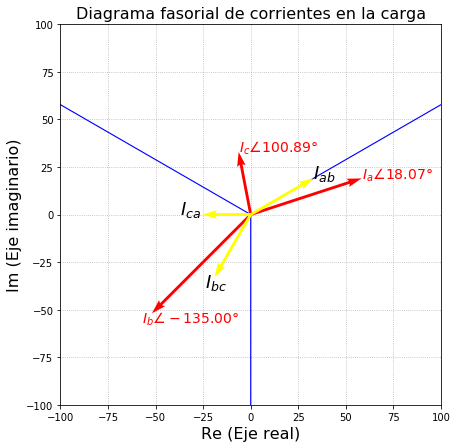

Ia  = (61.26 < 18.07°) A
Ib  = (73.41 < -135.00°) A
Ic  = (33.51 < 100.89°) A
Iab = (38.00 < 30.00°) A
Ibc = (38.00 < -120.00°) A
Ica = (25.33 < -180.00°) A
Uab = (380.00 < 30.00°) V
Ubc = (380.00 < -90.00°) V
Uca = (380.00 < 150.00°) V


In [23]:
%matplotlib inline
plt.figure(figsize=(7,7))
ax = plt.gca()
ax.quiver(0,0,Uab.real,Uab.imag,width=0.003,angles='xy',scale_units='xy',scale=1,color='blue')
ax.quiver(0,0,Ubc.real,Ubc.imag,width=0.003,angles='xy',scale_units='xy',scale=1,color='blue')
ax.quiver(0,0,Uca.real,Uca.imag,width=0.003,angles='xy',scale_units='xy',scale=1,color='blue')
ax.quiver(0,0,Ia.real,Ia.imag,angles='xy',scale_units='xy',scale=1,color='red')
ax.quiver(0,0,Ib.real,Ib.imag,angles='xy',scale_units='xy',scale=1,color='red')
ax.quiver(0,0,Ic.real,Ic.imag,angles='xy',scale_units='xy',scale=1,color='red')
ax.quiver(0,0,Iab.real,Iab.imag,angles='xy',scale_units='xy',scale=1,color='yellow')
ax.quiver(0,0,Ibc.real,Ibc.imag,angles='xy',scale_units='xy',scale=1,color='yellow')
ax.quiver(0,0,Ica.real,Ica.imag,angles='xy',scale_units='xy',scale=1,color='yellow')
plt.text(Ia.real, Ia.imag, r'$I_a ∠ %.2f°$'%(np.rad2deg(cmath.phase(Ia))), fontsize=14, color='red')
plt.text(Ib.real - 5 , Ib.imag - 5, r'$I_b ∠ %.2f$°'%(np.rad2deg(cmath.phase(Ib))), fontsize=14, color='red')
plt.text(Ic.real, Ic.imag, r'$I_c ∠ %.2f$°'%(np.rad2deg(cmath.phase(Ic))), fontsize=14, color='red')
plt.text(Iab.real, Iab.imag, r'$I_{ab}$', fontsize=18, fontweight='bold')
plt.text(Ibc.real - 5 , Ibc.imag - 5, r'$I_{bc}$', fontsize=18, fontweight='bold')
plt.text(Ica.real - 12, Ica.imag, r'$I_{ca}$', fontsize=18, fontweight='bold')
#plt.axhline(y=0, xmin=0.5, xmax=1, linestyle="--")
ax.set_aspect('equal')
plt.title('Diagrama fasorial de corrientes en la carga', fontsize=16)
plt.xlabel('Re (Eje real)',  fontsize=16)
plt.ylabel('Im (Eje imaginario)',  fontsize=16)
plt.grid(linestyle=":")
ax.set_axisbelow(True)
ax.set_xlim([-100,100])
ax.set_ylim([-100,100])
#plt.draw()
plt.show()
print('Ia  = (%.2f < %.2f°) A'%(abs(Ir), np.rad2deg( cmath.phase(Ir) ) ))
print('Ib  = (%.2f < %.2f°) A'%(abs(Is), np.rad2deg( cmath.phase(Is) ) ))
print('Ic  = (%.2f < %.2f°) A'%(abs(It), np.rad2deg( cmath.phase(It) ) ))
print('Iab = (%.2f < %.2f°) A'%(abs(Iab), np.rad2deg( cmath.phase(Iab) ) ))
print('Ibc = (%.2f < %.2f°) A'%(abs(Ibc), np.rad2deg( cmath.phase(Ibc) ) ))
print('Ica = (%.2f < %.2f°) A'%(abs(Ica), np.rad2deg( cmath.phase(Ica) ) ))
print('Uab = (%.2f < %.2f°) V'%(abs(Uab), np.rad2deg( cmath.phase(Uab) ) ))
print('Ubc = (%.2f < %.2f°) V'%(abs(Ubc), np.rad2deg( cmath.phase(Ubc) ) ))
print('Uca = (%.2f < %.2f°) V'%(abs(Uca), np.rad2deg( cmath.phase(Uca) ) ))

In [24]:
%reset -s -f

## Problema 6
Un sistema trifásico de secuencia TSR (cba), 3x380V, de 3 conductores alimenta una carga trifásica conectada en estrella.

$Z_a =6 \, \Omega$ con ángulo de desfasaje 0°     
$Z_b = 6 \, \Omega$ con ángulo de desfasaje 30° inductivo     
$Z_c = 5 \, \Omega$ con ángulo de desfasaje 45° inductivo

Construis el triángulo de tensiones y determinar la tensión de desplazamiento del neutro $V_{on}$

<img src="img/tp5ej6.png">

### Solución

In [25]:
import numpy as np
import cmath

In [26]:
# Datos:
Ean = cmath.rect(220 , 0)
Ebn = cmath.rect(220 , np.deg2rad(120))
Ecn = cmath.rect(220 , np.deg2rad(240))
Za = cmath.rect(6 , 0)
Zb = cmath.rect(6 , np.deg2rad(30))
Zc = cmath.rect(5 , np.deg2rad(45))

In [27]:
# Cálculo de admitancias
Ya = 1/Za
Yb = 1/Zb
Yc = 1/Zc
# Cálculo de tensión de neutro
Von = (Ean*Ya + Ebn*Yb + Ecn*Yc)/(Ya + Yb + Yc)
# Cálculo de tensiones de fase
Uao = Ean - Von
Ubo = Ebn - Von
Uco = Ecn - Von
# Cálculo de corrientes de fase
Ia = Uao/Za
Ib = Ubo/Zb
Ic = Uco/Zc

In [28]:
print('Admitancias:')
print('Ya = {:.3f} Ohm^-1 = (%.3f ∠ %.2f°) Ohm^-1'.format(Ya)%(abs(Ya), np.rad2deg(cmath.phase(Ya)) ))
print('Yb = {:.3f} Ohm^-1 = (%.3f ∠ %.2f°) Ohm^-1'.format(Yb)%(abs(Yb), np.rad2deg(cmath.phase(Yb)) ))
print('Yc = {:.3f} Ohm^-1 = (%.3f ∠ %.2f°) Ohm^-1'.format(Yc)%(abs(Yc), np.rad2deg(cmath.phase(Yc)) ))
print('Tensión de desplazamiento de neutro:')
print('Von = {:.2f}  V = (%.2f ∠ %.2f°) V'.format(Von)%(abs(Von), np.rad2deg(cmath.phase(Von)) ))
print('Tensiones de fase:')
print('Uao =  {:.2f} V = (%.2f ∠ %.2f°) V'.format(Uao)%(abs(Uao), np.rad2deg(cmath.phase(Uao)) ))
print('Ubo = {:.2f} V = (%.2f ∠ %.2f°) V'.format(Ubo)%(abs(Ubo), np.rad2deg(cmath.phase(Ubo)) ))
print('Uco = {:.2f} V = (%.2f ∠ %.2f°) V'.format(Uco)%(abs(Uco), np.rad2deg(cmath.phase(Uco)) ))
print('Corrientes de fase:')
print('Ia = {:.3f}   A = (%.3f ∠ %.2f) A'.format(Ia)%(abs(Ia), np.rad2deg(cmath.phase(Ia)) ))
print('Ib = {:.3f}   A = (%.3f ∠ %.2f) A'.format(Ib)%(abs(Ib), np.rad2deg(cmath.phase(Ib)) ))
print('Ic = {:.3f} A = (%.3f ∠ %.2f) A'.format(Ic)%(abs(Ic), np.rad2deg(cmath.phase(Ic)) ))

Admitancias:
Ya = 0.167+0.000j Ohm^-1 = (0.167 ∠ 0.00°) Ohm^-1
Yb = 0.144-0.083j Ohm^-1 = (0.167 ∠ -30.00°) Ohm^-1
Yc = 0.141-0.141j Ohm^-1 = (0.200 ∠ -45.00°) Ohm^-1
Tensión de desplazamiento de neutro:
Von = -32.61+39.68j  V = (51.35 ∠ 129.41°) V
Tensiones de fase:
Uao =  252.61-39.68j V = (255.70 ∠ -8.93°) V
Ubo = -77.39+150.85j V = (169.55 ∠ 117.16°) V
Uco = -77.39-230.20j V = (242.86 ∠ -108.58°) V
Corrientes de fase:
Ia = 42.101-6.613j   A = (42.617 ∠ -8.93) A
Ib = 1.400+28.223j   A = (28.258 ∠ 87.16) A
Ic = -43.501-21.610j A = (48.573 ∠ -153.58) A


In [29]:
Uab = Ebn - Ean
Ubc = Ecn - Ebn
Uca = Ean - Ecn

In [30]:
import matplotlib
import matplotlib.pyplot as plt

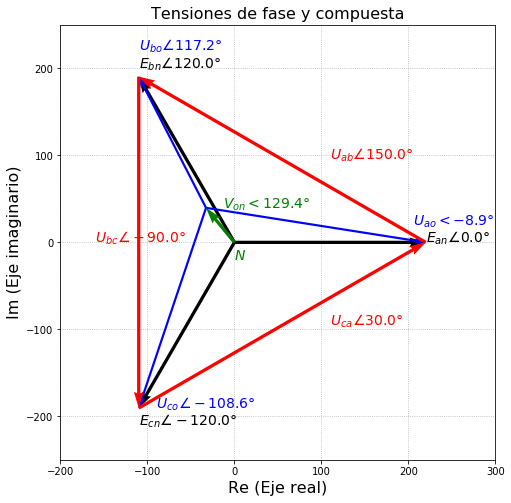

Tensiones de generación:
Ean = 220.00+0.00j  V = (220.00 ∠ 0.00°) V
Ebn = -110.00+190.53j  V = (220.00 ∠ 120.00°) V
Ecn = -110.00-190.53j  V = (220.00 ∠ -120.00°) V
Tensiones compuestas:
Uab = -330.00+190.53j  V = (381.05 ∠ 150.00°) V
Ubc = -0.00-381.05j  V = (381.05 ∠ -90.00°) V
Uca = 330.00+190.53j  V = (220.00 ∠ 30.00°) V
Tensión de desplazamiento de neutro:
Von = -32.61+39.68j  V = (51.35 ∠ 129.41°) V
Tensiones de fase:
Uao =  252.61-39.68j V = (255.70 ∠ -8.93°) V
Ubo = -77.39+150.85j V = (169.55 ∠ 117.16°) V
Uco = -77.39-230.20j V = (242.86 ∠ -108.58°) V


In [31]:
%matplotlib inline
plt.figure(figsize=(8,8))
ax = plt.gca()
ax.quiver(0,0,Ean.real,Ean.imag,angles='xy',scale_units='xy',scale=1)
ax.quiver(0,0,Ebn.real,Ebn.imag,angles='xy',scale_units='xy',scale=1)
ax.quiver(0,0,Ecn.real,Ecn.imag,angles='xy',scale_units='xy',scale=1)
ax.quiver(Von.real,Von.imag,Uao.real,Uao.imag,width=0.005,angles='xy',scale_units='xy',scale=1,color='blue')
ax.quiver(Von.real,Von.imag,Ubo.real,Ubo.imag,width=0.005,angles='xy',scale_units='xy',scale=1,color='blue')
ax.quiver(Von.real,Von.imag,Uco.real,Uco.imag,width=0.005,angles='xy',scale_units='xy',scale=1,color='blue')
ax.quiver(0,0,Von.real,Von.imag,angles='xy',scale_units='xy',scale=1,color='green')
ax.quiver(Ean.real,Ean.imag,Uab.real,Uab.imag,angles='xy',scale_units='xy',scale=1,color='red')
ax.quiver(Ecn.real,Ecn.imag,Uca.real,Uca.imag,angles='xy',scale_units='xy',scale=1,color='red')
ax.quiver(Ebn.real,Ebn.imag,Ubc.real,Ubc.imag,angles='xy',scale_units='xy',scale=1,color='red')
plt.text(Ean.real, Ean.imag, r'$E_{an} ∠ %.1f°$'%(np.rad2deg(cmath.phase(Ean))), fontsize=14)
plt.text(Ebn.real, Ebn.imag + 10, r'$E_{bn} ∠ %.1f°$'%(np.rad2deg(cmath.phase(Ebn))), fontsize=14)
plt.text(Ecn.real, Ecn.imag - 20, r'$E_{cn} ∠ %.1f°$'%(np.rad2deg(cmath.phase(Ecn))), fontsize=14)
plt.text(Ean.real/2, Ebn.imag/2, r'$U_{ab} ∠ %.1f°$'%(np.rad2deg(cmath.phase(Uab))), fontsize=14,color='red')
plt.text(Ean.real/2, Ecn.imag/2, r'$U_{ca} ∠ %.1f°$'%(np.rad2deg(cmath.phase(Uca))), fontsize=14,color='red')
plt.text(Ebn.real - 50, 0, r'$U_{bc} ∠ %.1f°$'%(np.rad2deg(cmath.phase(Ubc))), fontsize=14,color='red')
plt.text(Von.real + 20, Von.imag, r'$V_{on} < %.1f°$'%(np.rad2deg(cmath.phase(Von))), fontsize=14,color='green')
plt.text(Uao.real + Von.real - 15, Uao.imag + Von.imag + 20, r'$U_{ao} < %.1f°$'%(np.rad2deg(cmath.phase(Uao))), fontsize=14,color='blue')
plt.text(Ubo.real + Von.real, Ubo.imag + Von.imag + 30, r'$U_{bo} ∠ %.1f°$'%(np.rad2deg(cmath.phase(Ubo))), fontsize=14,color='blue')
plt.text(Uco.real + Von.real + 20, Uco.imag + Von.imag, r'$U_{co} ∠ %.1f°$'%(np.rad2deg(cmath.phase(Uco))), fontsize=14,color='blue')
plt.text(0, -20, r'$N$', fontsize=14,color='green')
ax.set_aspect('equal')
plt.title('Tensiones de fase y compuesta', fontsize=16)
plt.xlabel('Re (Eje real)',  fontsize=16)
plt.ylabel('Im (Eje imaginario)',  fontsize=16)
plt.grid(linestyle=":")
ax.set_axisbelow(True)
ax.set_xlim([-200,300])
ax.set_ylim([-250,250])
#plt.draw()
plt.show()
print('Tensiones de generación:')
print('Ean = {:.2f}  V = (%.2f ∠ %.2f°) V'.format(Ean)%(abs(Ean), np.rad2deg(cmath.phase(Ean)) ))
print('Ebn = {:.2f}  V = (%.2f ∠ %.2f°) V'.format(Ebn)%(abs(Ebn), np.rad2deg(cmath.phase(Ebn)) ))
print('Ecn = {:.2f}  V = (%.2f ∠ %.2f°) V'.format(Ecn)%(abs(Ecn), np.rad2deg(cmath.phase(Ecn)) ))
print('Tensiones compuestas:')
print('Uab = {:.2f}  V = (%.2f ∠ %.2f°) V'.format(Uab)%(abs(Uab), np.rad2deg(cmath.phase(Uab)) ))
print('Ubc = {:.2f}  V = (%.2f ∠ %.2f°) V'.format(Ubc)%(abs(Ubc), np.rad2deg(cmath.phase(Ubc)) ))
print('Uca = {:.2f}  V = (%.2f ∠ %.2f°) V'.format(Uca)%(abs(Ecn), np.rad2deg(cmath.phase(Uca)) ))
print('Tensión de desplazamiento de neutro:')
print('Von = {:.2f}  V = (%.2f ∠ %.2f°) V'.format(Von)%(abs(Von), np.rad2deg(cmath.phase(Von)) ))
print('Tensiones de fase:')
print('Uao =  {:.2f} V = (%.2f ∠ %.2f°) V'.format(Uao)%(abs(Uao), np.rad2deg(cmath.phase(Uao)) ))
print('Ubo = {:.2f} V = (%.2f ∠ %.2f°) V'.format(Ubo)%(abs(Ubo), np.rad2deg(cmath.phase(Ubo)) ))
print('Uco = {:.2f} V = (%.2f ∠ %.2f°) V'.format(Uco)%(abs(Uco), np.rad2deg(cmath.phase(Uco)) ))

-----------
<a href="https://colab.research.google.com/github/daniel-lorenzo/Electrotecnia/blob/master/Ejercitacion/TP5-2.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>